Title: Handwritten Digit Prediction

Objective: A Handwritten Digit Prediction machine learning project aims to develop a model that can recognize and classify handwritten digits accurately, with applications ranging from automation and data extraction to educational and research purposes.

Import Library

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Import Data

In [25]:
data=load_digits()

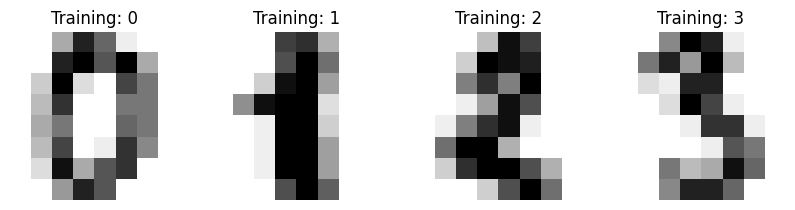

In [26]:
_, axes =plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,data.images,data.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training: %i" %label)

Data Preprocessing

In [27]:
data.images.shape

(1797, 8, 8)

In [28]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [29]:
len(data.images)

1797

In [30]:
n_sample=len(data.images)
data1=data.images.reshape((n_sample,-1))

In [31]:
data1.shape

(1797, 64)

Scaling the Image Data

In [32]:
data1.min()

0.0

In [33]:
data1.max()

16.0

In [34]:
data1=data1/16

In [35]:
data1.min()

0.0

In [36]:
data1.max()

1.0

Train Test Split Data

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(data1, data.target, test_size=0.3)

In [38]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1257, 64), (540, 64), (1257,), (540,))

Model Selection : Random Forest Classifier VS Decsion Tree Classifier

In [41]:
RF=RandomForestClassifier()

In [42]:
RF.fit(xtrain,ytrain)

RandomForestClassifier()

In [43]:
ypred=RF.predict(xtest)

In [44]:
DT=DecisionTreeClassifier()

In [45]:
DT.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [46]:
ypred1=DT.predict(xtest)

Model Accuracy For both classifiers

Random Forest

In [48]:
confusion_matrix(ytest,ypred)

array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  2, 65,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 62,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 53,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 39]])

In [49]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.96      0.96      0.96        52
           2       0.98      0.97      0.98        67
           3       1.00      0.97      0.98        64
           4       0.97      0.98      0.97        58
           5       0.96      0.98      0.97        54
           6       1.00      0.98      0.99        55
           7       0.96      1.00      0.98        45
           8       0.92      1.00      0.96        44
           9       1.00      0.93      0.96        42

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.97       540
weighted avg       0.98      0.98      0.98       540



Decision Tree Classifier

In [50]:
confusion_matrix(ytest,ypred1)

array([[54,  0,  1,  0,  0,  1,  0,  0,  0,  3],
       [ 0, 44,  4,  2,  1,  1,  0,  0,  0,  0],
       [ 0,  2, 55,  1,  0,  0,  2,  2,  5,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  3,  4,  4],
       [ 2,  1,  1,  0, 49,  0,  0,  4,  0,  1],
       [ 1,  0,  0,  1,  2, 45,  0,  1,  2,  2],
       [ 2,  1,  0,  0,  5,  0, 47,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0, 36,  5,  1],
       [ 0,  5,  0,  2,  1,  3,  0,  0, 33,  0],
       [ 0,  0,  0,  2,  1,  3,  0,  2,  0, 34]])

In [52]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.80      0.85      0.82        52
           2       0.90      0.82      0.86        67
           3       0.87      0.83      0.85        64
           4       0.83      0.84      0.84        58
           5       0.83      0.83      0.83        54
           6       0.96      0.85      0.90        55
           7       0.75      0.80      0.77        45
           8       0.67      0.75      0.71        44
           9       0.76      0.81      0.78        42

    accuracy                           0.83       540
   macro avg       0.83      0.83      0.83       540
weighted avg       0.84      0.83      0.83       540



Explanation: In my Handwritten Digit Predictor machine learning project, I diligently performed data scaling and preprocessing, ensuring the dataset was well-prepared for modeling. I conducted a detailed comparison between two classification models: the Decision Tree Classifier and the Random Forest Classifier. The analysis revealed that the Random Forest Classifier achieved significantly higher accuracy, establishing it as the superior choice for accurate handwritten digit recognition.